# Task 3 - Bifurcation in higher dimensions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

from helpers.math import AndronovHopf
from helpers.plots import plot_phase_portrait, plot_orbit, plot_cusp


## 3.1 Andronov-Hopf bifurcation

### 3.1.0 Mathematical description

$$ \dot x_1 = \alpha x_1 - x_2 - x_1 (x_1^2 + x_2^2) \\
\dot x_2 = x_1 + \alpha x_2 - x_2 (x_1^2 + x_2^2) $$

### 3.1.1 Phase portraits of Andronov-Hopf bifurcation

In [2]:
def show_andronov_hopf_phase_plots(alpha: float, savepath: str) -> None:
    """
    Show the phase portrait of the Andronov-Hopf system.

    NOTE: Explicit choice to leave this function inside the notebook, since it simply combines the calls of other
    functions and does not show any greater general use.

    :param alpha: The parameter alpha
    :type alpha: float
    :param savepath: The path to save the plot to
    :type savepath: str
    """
    x1 = np.arange(-2, 2.0, 0.1)
    x2 = np.arange(-2, 2.0, 0.1)
    X1, X2 = np.meshgrid(x1, x2)
    U, V = AndronovHopf.calc_flows((X1, X2), alpha)

    title = r"Phase portrait for Andronov-Hopf bifurcation, $\alpha = {}$".format(alpha)

    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    plot_phase_portrait(mesh_tuple=(X1, X2), flow_tuple=(U, V), density=1.2, ax=ax)
    ax.set_xlabel(r"$x_1$")
    ax.set_ylabel(r"$x_2$")
    ax.grid()
    ax.set_title(title)
    fig.tight_layout()
    fig.savefig(f"{savepath}_alpha_{alpha}.pdf")


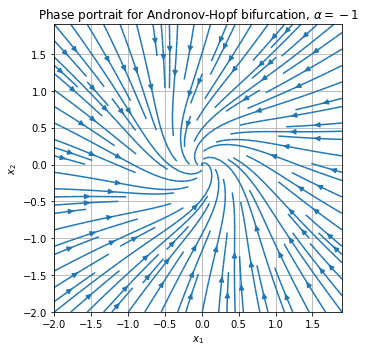

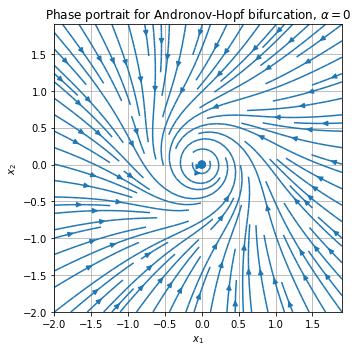

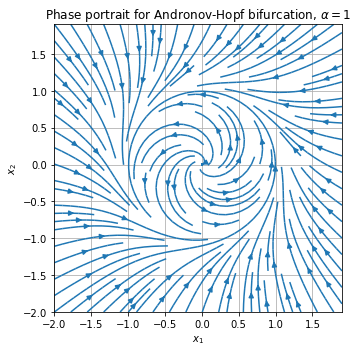

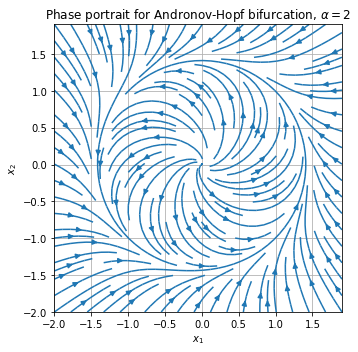

In [3]:
ALPHAS = [-1, 0, 1, 2]
for alpha in ALPHAS:
    path = f"plots/task_3_phase"
    show_andronov_hopf_phase_plots(alpha, path)


### 3.2 Orbits of Andronov-Hopf bifurcation

In [4]:
def show_andronov_hopf_orbit_plots(t: np.ndarray, y0: tuple[float, float], alpha: float, savepath: str) -> None:
    """Plot Orbits of the Andronov-Hopf system.

    NOTE: Explicit choice to leave this function inside the notebook, since it simply combines the calls of other
    functions and does not show any greater general use.

    param t: The time vector
    type t: np.ndarray
    param y0: The initial conditions (x1, x2)
    type y0: tuple[float, float]
    param alpha: The parameter alpha
    type alpha: float
    param savepath: The path to save the plot to
    type savepath: str
    """
    xlim = [-1.5, 2.5]
    ylim = [-1.5, 1.5]

    X1, X2 = np.meshgrid(np.arange(*xlim, 0.1), np.arange(*ylim, 0.1))
    U, V = AndronovHopf.calc_flows((X1, X2), alpha)

    x1, x2 = AndronovHopf.solve(t, y0, alpha)
    title = r"Orbit for Andronov-Hopf bifurcation, $\alpha = {}$".format(alpha)

    fig, ax = plt.subplots(1, 1, figsize=(7, 7))
    plot_phase_portrait((X1, X2), (U, V), density=1.5, ax=ax, color=(0.1, 0.2, 0.5, 0.1), zorder=1)
    plot_orbit(x1, x2, ax=ax)
    ax.set_xlabel(r"$x_1$")
    ax.set_ylabel(r"$x_2$")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.grid()
    ax.legend()
    ax.set_title(title)
    fig.tight_layout()
    fig.savefig(f"{savepath}_alpha_{alpha}_y0_{y0}.pdf", bbox_inches="tight")


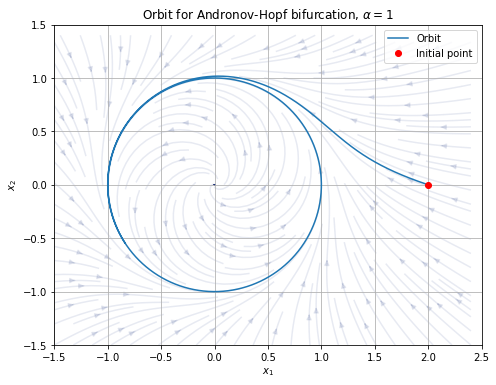

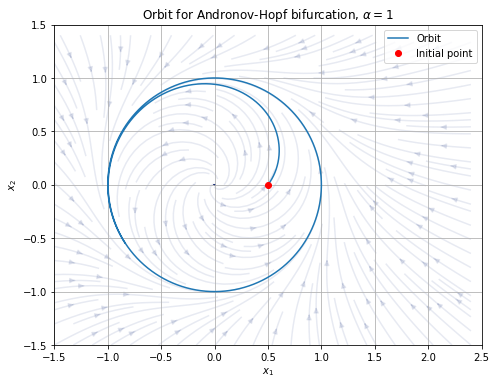

In [5]:
T = np.arange(0, 10, 0.00001)
ALPHA = 1
Y0_VEC = [(2, 0), (0.5, 0)]

for y0 in Y0_VEC:
    show_andronov_hopf_orbit_plots(T, y0, ALPHA, "plots/task_3_orbit")


## 3.3 The cusp bifurcation

### 3.1.0 Mathematical description

$$ \dot x = \alpha_1 + \alpha_2 x - x^3 $$

### 3.1.1 General Cusp Plot

In [6]:
interact(
    plot_cusp,
    x_min_max=widgets.FloatRangeSlider(min=-10, max=10, step=0.1, value=(-3, 3)),
    alpha2_min_max=widgets.FloatRangeSlider(min=-10, max=10, step=0.1, value=(0.2, 9.7)),
    elev=widgets.IntSlider(min=0, max=360, step=1, value=47),
    azim=widgets.IntSlider(min=0, max=360, step=1, value=120),
)


interactive(children=(FloatRangeSlider(value=(-3.0, 3.0), description='x_min_max', max=10.0, min=-10.0), Float…

<function helpers.plots.plot_cusp(x_min_max: tuple, alpha2_min_max: tuple, elev: int, azim: int) -> tuple>

### 3.3.2 Generate side-view plot

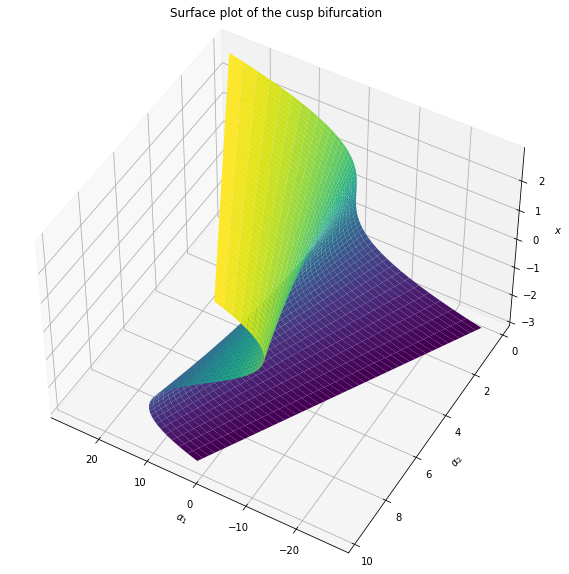

In [7]:
fig, _ = plot_cusp(x_min_max=(-3, 3), alpha2_min_max=(0.2, 9.7), elev=47, azim=120)
fig.savefig("plots/task_3_cusp.pdf")


### 3.3.3 Generate top-view plot

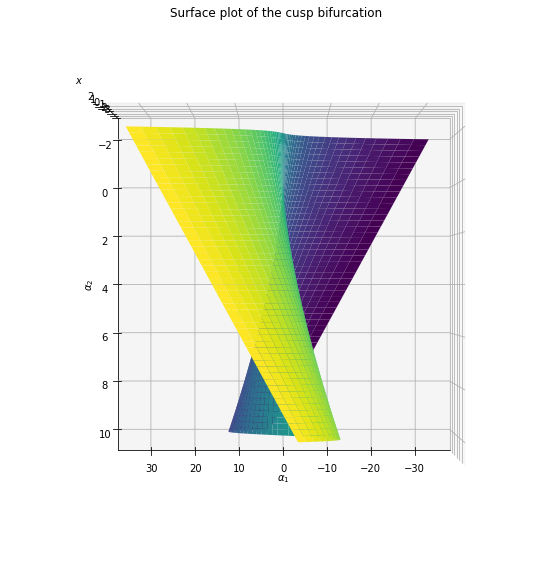

In [8]:
fig, _ = plot_cusp(x_min_max=(-3, 3), alpha2_min_max=(-2, 10.0), elev=90, azim=90)
fig.savefig("plots/task_3_cusp_top_view.pdf")
